In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special

In [2]:
def get_q(nm, wavelength, theta):
    """
    Returns the q-value of a given theta
    """
    return (4 * np.pi * nm) / wavelength * np.sin(theta / 2)

def get_qs(nm, wavelength, theta):
    """
    Returns the q-value of a given theta
    """
    return (2 * np.pi * nm) / wavelength

def form_factor_sphere(r, theta = 90, wavelength = 532, nm = 1.33):
    """
    Returns the form factor of a sphere
    """
    q = get_q(nm, wavelength, theta)

    return 3 / (q*r)**3 * (np.sin(q*r) - q*r*np.cos(q*r))

def form_factor_spherical_shell(r, theta = 90, wavelength = 532, nm = 1.33):
    """
    Returns the form factor of a spherical shell
    """
    q = get_q(nm, wavelength, theta)

    return np.sin(q*r) / (q*r)

def form_factor_circular_path(rp, factor = 1, theta = 90, wavelength = 532, nm = 1.33):
    """
    Returns the form factor of a circular path
    """
    rp  = rp * factor

    qs = get_qs(nm, wavelength, theta)

    return 2 * scipy.special.j1(qs*rp) / (qs*rp)   


### Define settings

In [3]:
r = np.linspace(0.1, 300, 501) #Radius in nanometers
wavelength=532 #Wavelength in nanometers

x_sphere = form_factor_sphere(r, wavelength=wavelength)
x_shell = form_factor_spherical_shell(r, wavelength=wavelength)
x_path3 = form_factor_circular_path(r, factor = 1, wavelength=wavelength)
x_path4 = form_factor_circular_path(r, factor = 4, wavelength=wavelength)

#Squared
XSs = x_sphere**2
XSe = x_shell**2
XSp = x_path3**2

#Norm
XNs = np.array([np.linalg.norm(x) for x in x_sphere])
XNe = np.array([np.linalg.norm(x) for x in x_shell])
XNp = np.array([np.linalg.norm(x) for x in x_path3])

#Squared norm
XNSs = XNs**2
XNSe = XNe**2
XNSp = XNp**2

#### Form factor(squared) vs Radius

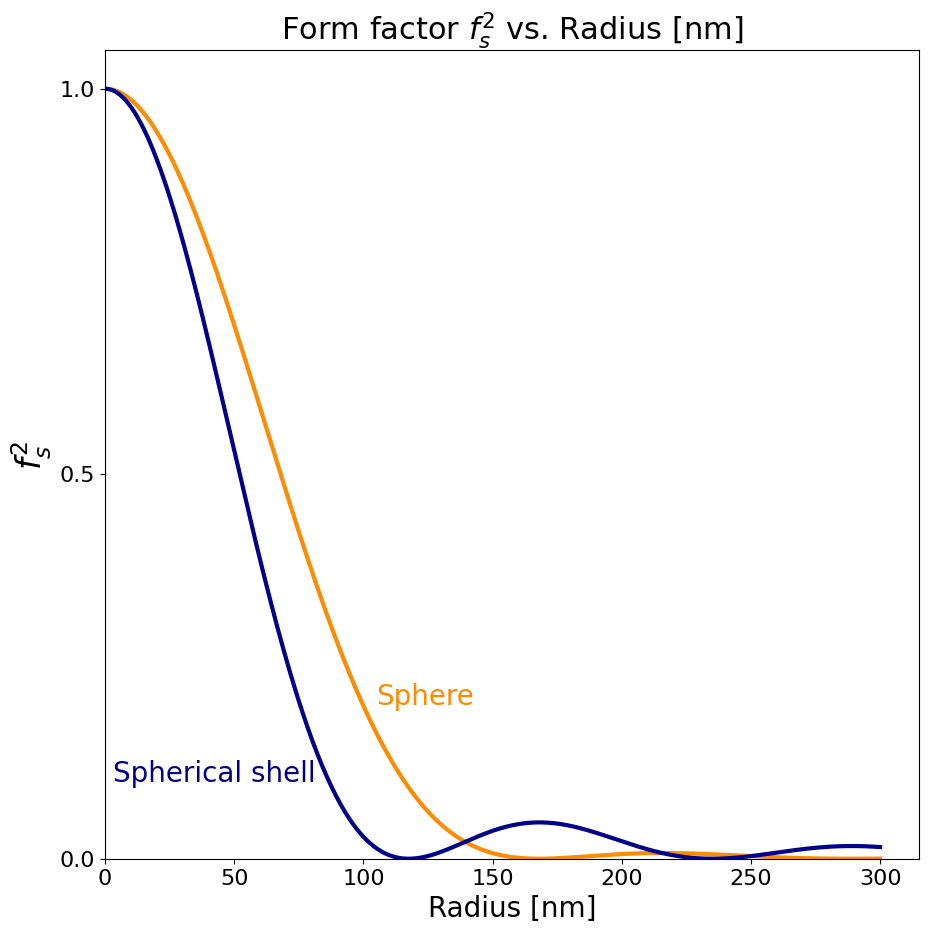

In [4]:
fig, axes = plt.subplots(figsize = (8, 8))
axes.plot(r, XSs, color = 'darkorange', label = 'Sphere', linewidth = 3)
axes.plot(r, XSe, color = 'darkblue', label = 'Spherical Shell', linewidth = 3)
#axes.plot(r, XSp, color = 'darkgreen', label = 'Circular patch $r_p = r$', linewidth = 3)
#axes.plot(r, x_path4**2, color = 'darkred', label = 'Circular patch $r_p = 4r$', linewidth = 3)

axes.text(105, 0.20, s = 'Sphere', color = 'darkorange', fontsize=20)
axes.text(3, 0.10, s = 'Spherical shell', color = 'darkblue', fontsize=20)
#axes.text(140, 0.30, s = 'Circular patch $r_p = r$', color = 'darkgreen', fontsize=20)
#axes.text(5, 0.20, s = '$r_p = 4r$', color = 'darkred', fontsize=16)
axes.set_title('Form factor $f_{s}^{2}$ vs. Radius [nm]', fontsize = 22)
axes.set_xlabel('Radius [nm]', fontsize=20)
axes.set_ylabel('$f_{s}^{2}$', fontsize=24)
axes.set_ylim(ymin=0)
axes.set_xlim(xmin=0)
axes.set_yticks([0.0, 0.5, 1.0])
axes.set_yticklabels(['0.0', '0.5', '1.0'], fontsize = 16)
axes.set_xticks(np.arange(0, int(np.max(r)+1), 50))
axes.set_xticklabels([f'{x}' for x in np.arange(0, int(np.max(r)+1), 50)], fontsize = 16)
#axes.legend( loc = 'upper right', fontsize = 16, frameon = False)
fig.set_size_inches(10.5, 10.5)  
fig.savefig(f'rayleighgans_radius_{wavelength}_squared.svg', format = 'svg', dpi = 300, bbox_inches = 'tight', facecolor = 'white')
plt.show()

#### Form factor(abs) vs Radius

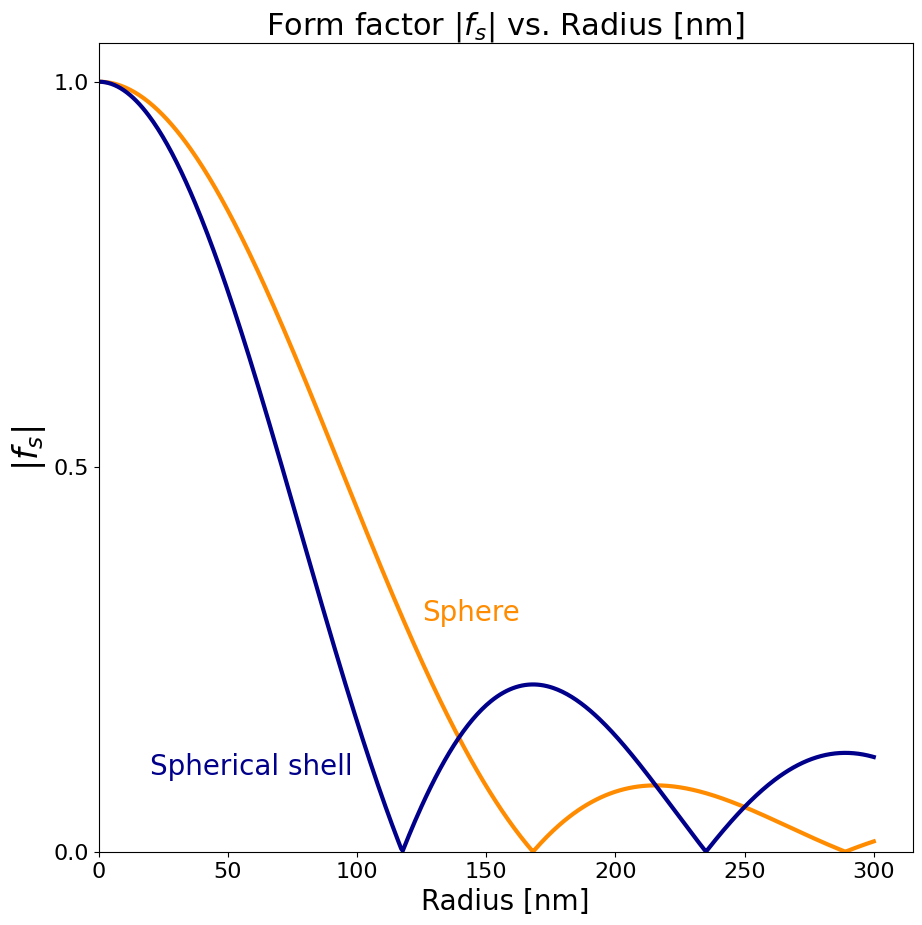

In [5]:
fig, axes = plt.subplots(figsize = (8, 8))
axes.plot(r, XNs, color = 'darkorange', label = 'Sphere', linewidth = 3)
axes.plot(r, XNe, color = 'darkblue', label = 'Spherical Shell', linewidth = 3)
#axes.plot(r, XNp, color = 'darkgreen', label = 'Circular patch $r_p = r$', linewidth = 3)
#axes.plot(r, x_path4**2, color = 'darkred', label = 'Circular patch $r_p = 4r$', linewidth = 3)

axes.text(125, 0.30, s = 'Sphere', color = 'darkorange', fontsize=20)
axes.text(20, 0.10, s = 'Spherical shell', color = 'darkblue', fontsize=20)
#axes.text(160, 0.45, s = 'Circular patch $r_p = r$', color = 'darkgreen', fontsize=20)
#axes.text(5, 0.20, s = '$r_p = 4r$', color = 'darkred', fontsize=16)
axes.set_title('Form factor $|f_{s}|$ vs. Radius [nm]', fontsize = 22)
axes.set_xlabel('Radius [nm]', fontsize=20)
axes.set_ylabel('$|f_{s}|$', fontsize=24)
axes.set_ylim(ymin=0)
axes.set_xlim(xmin=0)
axes.set_yticks([0.0, 0.5, 1.0])
axes.set_yticklabels(['0.0', '0.5', '1.0'], fontsize = 16)
axes.set_xticks(np.arange(0, int(np.max(r)+1), 50))
axes.set_xticklabels([f'{x}' for x in np.arange(0, int(np.max(r)+1), 50)], fontsize = 16)
#axes.legend( loc = 'upper right', fontsize = 16, frameon = False)
fig.set_size_inches(10.5, 10.5)  
fig.savefig(f'rayleighgans_radius_{wavelength}_norm.svg', format = 'svg', dpi = 300, bbox_inches = 'tight', facecolor = 'white')
plt.show()

#### Form factor(abs and squared) vs Radius

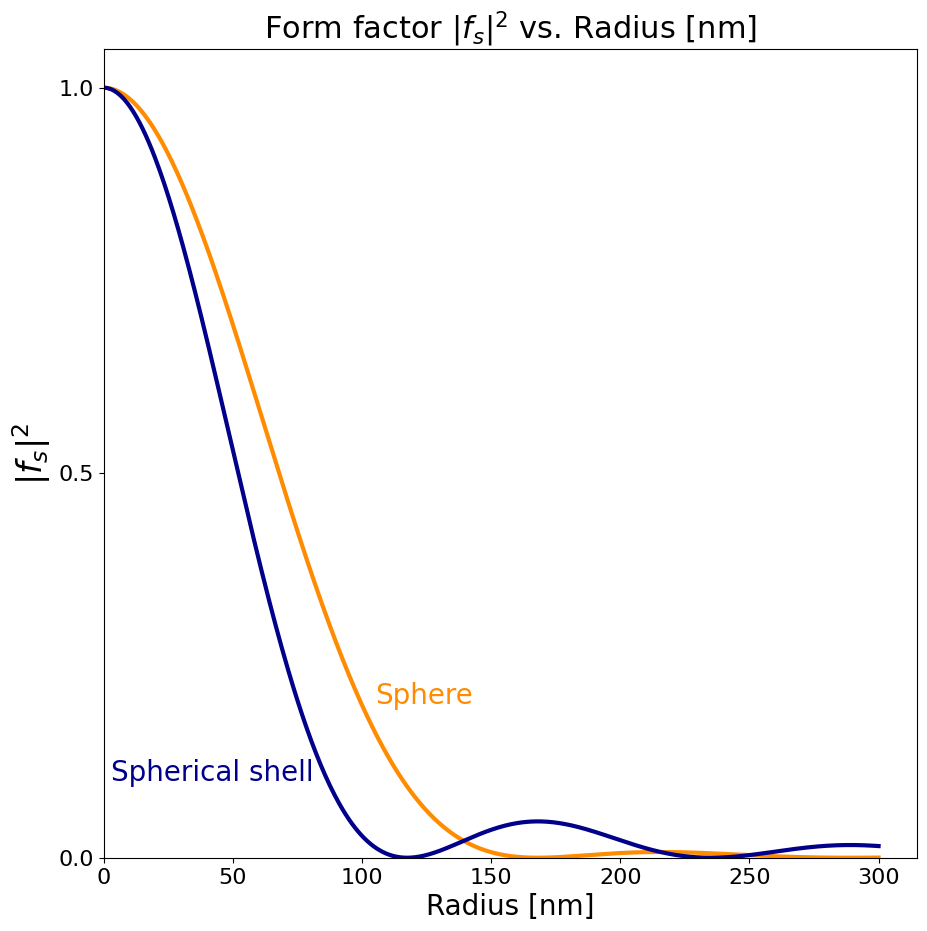

In [6]:
fig, axes = plt.subplots(figsize = (8, 8))
axes.plot(r, XNSs, color = 'darkorange', label = 'Sphere', linewidth = 3)
axes.plot(r, XNSe, color = 'darkblue', label = 'Spherical Shell', linewidth = 3)
#axes.plot(r, XNSp, color = 'darkgreen', label = 'Circular patch $r_p = r$', linewidth = 3)
#axes.plot(r, x_path4**2, color = 'darkred', label = 'Circular patch $r_p = 4r$', linewidth = 3)

axes.text(105, 0.20, s = 'Sphere', color = 'darkorange', fontsize=20)
axes.text(3, 0.10, s = 'Spherical shell', color = 'darkblue', fontsize=20)
#axes.text(120, 0.40, s = 'Circular patch $r_p = r$', color = 'darkgreen', fontsize=20)
#axes.text(5, 0.20, s = '$r_p = 4r$', color = 'darkred', fontsize=16)
axes.set_title('Form factor $|f_{s}|^{2}$ vs. Radius [nm]', fontsize = 22)
axes.set_xlabel('Radius [nm]', fontsize=20)
axes.set_ylabel('$|f_{s}|^{2}$', fontsize=24)
axes.set_ylim(ymin=0)
axes.set_xlim(xmin=0)
axes.set_yticks([0.0, 0.5, 1.0])
axes.set_yticklabels(['0.0', '0.5', '1.0'], fontsize = 16)
axes.set_xticks(np.arange(0, int(np.max(r)+1), 50))
axes.set_xticklabels([f'{x}' for x in np.arange(0, int(np.max(r)+1), 50)], fontsize = 16)
#axes.legend( loc = 'upper right', fontsize = 16, frameon = False)
fig.set_size_inches(10.5, 10.5)  
fig.savefig(f'rayleighgans_radius_{wavelength}_normsquared.svg', format = 'svg', dpi = 300, bbox_inches = 'tight', facecolor = 'white')
plt.show()

#### Keeping Radius fixed

In [7]:
theta = np.linspace(0.01, np.pi, 251)
r_fix = 100
wavelength = 532
y_sphere = form_factor_sphere(r_fix, theta, wavelength=wavelength)
y_shell = form_factor_spherical_shell(r_fix, theta, wavelength=wavelength)

#Squared
XSsa = y_sphere**2
XSea = y_shell**2

#Norm
XNsa = np.array([np.linalg.norm(x) for x in y_sphere])
XNea = np.array([np.linalg.norm(x) for x in y_shell])

#Squared norm
XNSsa = XNsa**2
XNSea = XNea**2


#### Form factor(squared) vs Angle

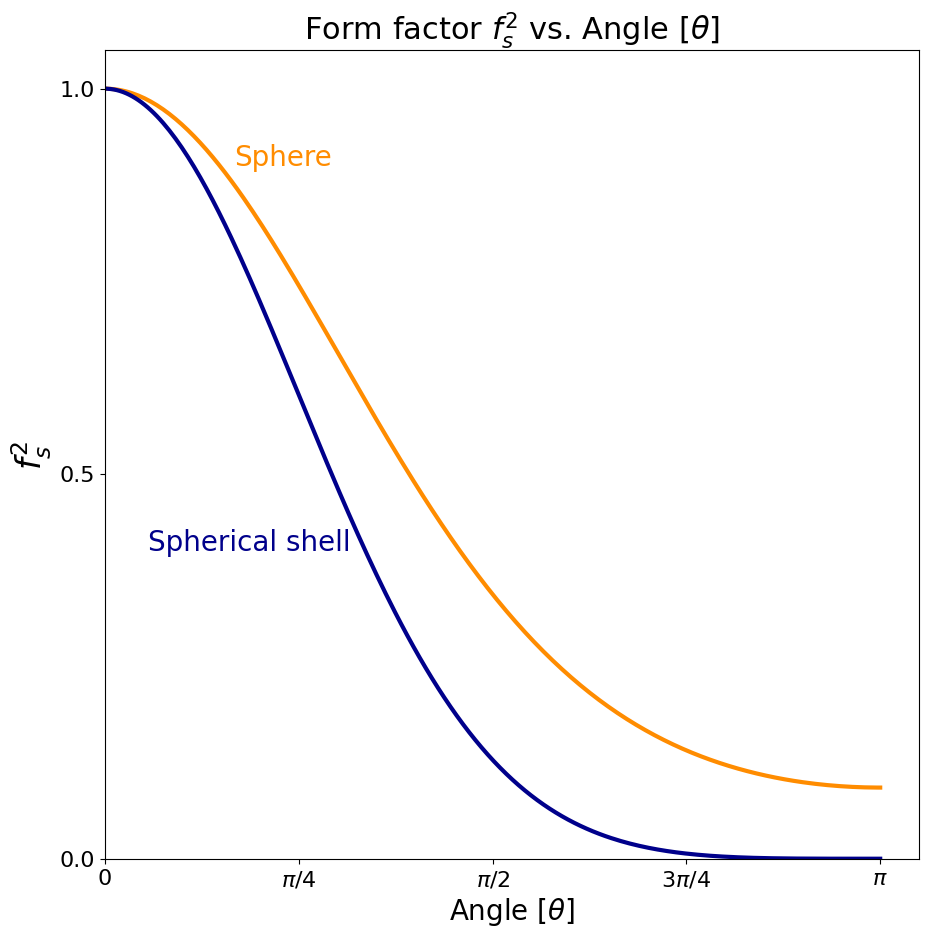

In [8]:
fig, axes = plt.subplots(figsize = (8, 8))
axes.plot(theta, XSsa, color = 'darkorange', label = 'Sphere', linewidth = 3)
axes.plot(theta, XSea, color = 'darkblue', label = 'Spherical Shell', linewidth = 3)

axes.text(np.pi/6, 0.9, s = 'Sphere', color = 'darkorange', fontsize=20)
axes.text(np.pi/18, 0.4, s = 'Spherical shell', color = 'darkblue', fontsize=20)

axes.set_title('Form factor $f_{s}^{2}$ vs. Angle [$\\theta$]', fontsize = 22)
axes.set_xlabel('Angle [$\\theta$]', fontsize=20)
axes.set_ylabel('$f_{s}^{2}$', fontsize=24)
axes.set_ylim(ymin=0)
axes.set_xlim(xmin=0)
axes.set_xticks([0, np.pi/4, np.pi/2, 3/4 * np.pi, np.pi])
axes.set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'], fontsize = 16)
axes.set_yticks([0.0, 0.5, 1.0])
axes.set_yticklabels(['0.0', '0.5', '1.0'], fontsize = 16)
#axes.legend( loc = 'upper right', fontsize = 16, frameon = False)
fig.set_size_inches(10.5, 10.5)  
fig.savefig(f'rayleighgans_angle_{wavelength}_squared.svg', format = 'svg', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

#### Form factor(abs) vs Angle

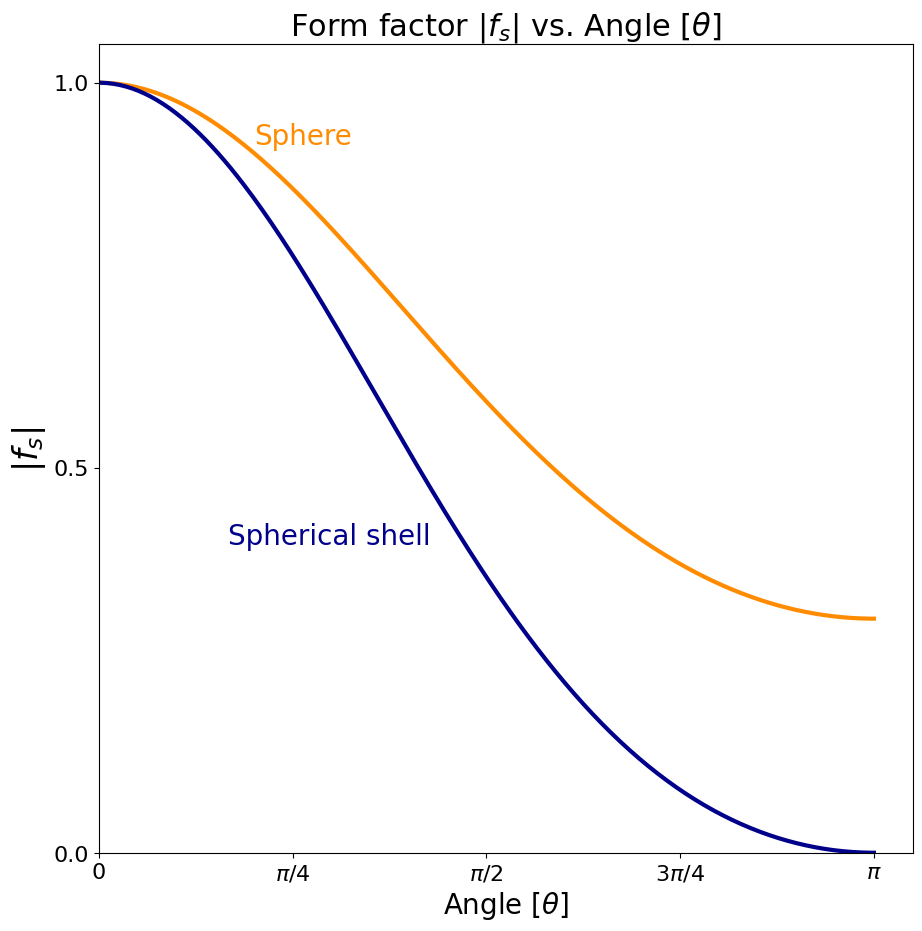

In [9]:
fig, axes = plt.subplots(figsize = (8, 8))
axes.plot(theta, XNsa, color = 'darkorange', label = 'Sphere', linewidth = 3)
axes.plot(theta, XNea, color = 'darkblue', label = 'Spherical Shell', linewidth = 3)

axes.text(np.pi/5, 0.92, s = 'Sphere', color = 'darkorange', fontsize=20)
axes.text(np.pi/6, 0.4, s = 'Spherical shell', color = 'darkblue', fontsize=20)

axes.set_title('Form factor $|f_{s}|$ vs. Angle [$\\theta$]', fontsize = 22)
axes.set_xlabel('Angle [$\\theta$]', fontsize=20)
axes.set_ylabel('$|f_{s}|$', fontsize=24)
axes.set_ylim(ymin=0)
axes.set_xlim(xmin=0)
axes.set_xticks([0, np.pi/4, np.pi/2, 3/4 * np.pi, np.pi])
axes.set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'], fontsize = 16)
axes.set_yticks([0.0, 0.5, 1.0])
axes.set_yticklabels(['0.0', '0.5', '1.0'], fontsize = 16)
#axes.legend( loc = 'upper right', fontsize = 16, frameon = False)
fig.set_size_inches(10.5, 10.5)  
fig.savefig(f'rayleighgans_angle_{wavelength}_norm.svg', format = 'svg', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

#### Form factor(abs and squared) vs Angle

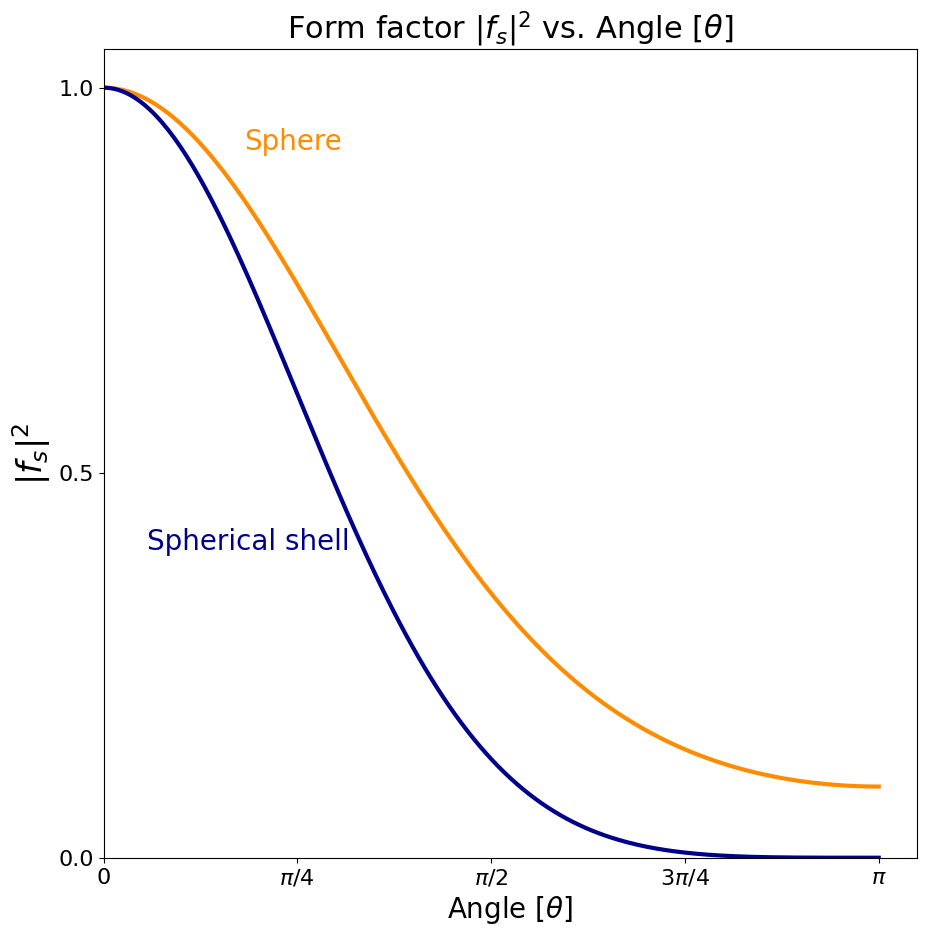

In [10]:
fig, axes = plt.subplots(figsize = (8, 8))
axes.plot(theta, XNSsa, color = 'darkorange', label = 'Sphere', linewidth = 3)
axes.plot(theta, XNSea, color = 'darkblue', label = 'Spherical Shell', linewidth = 3)

axes.text(np.pi/5.5, 0.92, s = 'Sphere', color = 'darkorange', fontsize=20)
axes.text(np.pi/18, 0.4, s = 'Spherical shell', color = 'darkblue', fontsize=20)

axes.set_title('Form factor $|f_{s}|^{2}$ vs. Angle [$\\theta$]', fontsize = 22)
axes.set_xlabel('Angle [$\\theta$]', fontsize=20)
axes.set_ylabel('$|f_{s}|^{2}$', fontsize=24)
axes.set_ylim(ymin=0)
axes.set_xlim(xmin=0)
axes.set_xticks([0, np.pi/4, np.pi/2, 3/4 * np.pi, np.pi])
axes.set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'], fontsize = 16)
axes.set_yticks([0.0, 0.5, 1.0])
axes.set_yticklabels(['0.0', '0.5', '1.0'], fontsize = 16)
#axes.legend( loc = 'upper right', fontsize = 16, frameon = False)
fig.set_size_inches(10.5, 10.5)  
fig.savefig(f'rayleighgans_angle_{wavelength}_normsquared.svg', format = 'svg', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

#### Subplots of both cases side by side

In [11]:
legend = True

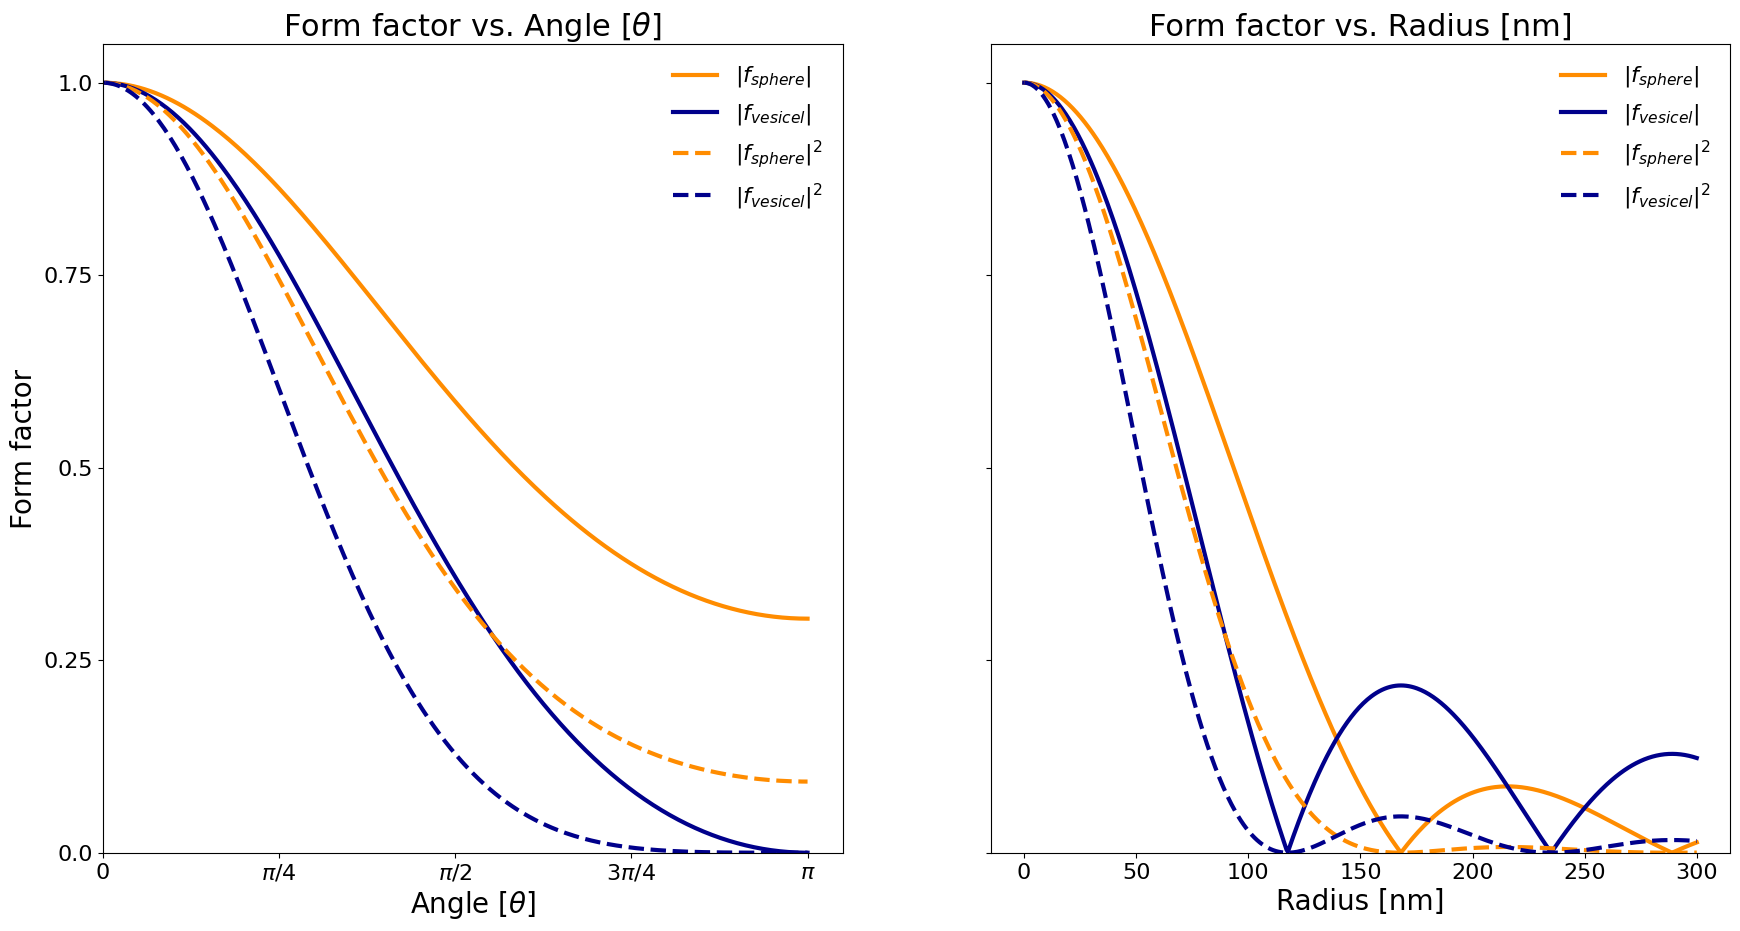

In [12]:
fig, axes = plt.subplots(1, 2, sharey = True, figsize = (8, 16))

#Angle plot
axes[0].plot(theta, XNsa, color = 'darkorange', label = '$|f_{sphere}|$', linewidth = 3)
axes[0].plot(theta, XNea, color = 'darkblue', label = '$|f_{vesicel}|$', linewidth = 3)

axes[0].plot(theta, XNSsa, color = 'darkorange', label = '$|f_{sphere}|^{2}$', linewidth = 3, linestyle = '--')
axes[0].plot(theta, XNSea, color = 'darkblue', label = '$|f_{vesicel}|^{2}$', linewidth = 3, linestyle = '--')

axes[0].set_title('Form factor vs. Angle [$\\theta$]', fontsize = 22)
axes[0].set_xlabel('Angle [$\\theta$]', fontsize=20)
axes[0].set_ylabel('Form factor', fontsize=20)
axes[0].set_ylim(ymin=0)
axes[0].set_xlim(xmin=0)
axes[0].set_xticks([0, np.pi/4, np.pi/2, 3/4 * np.pi, np.pi])
axes[0].set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'], fontsize = 16)
axes[0].set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
axes[0].set_yticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'], fontsize = 16)

#Add text
if legend:
    axes[0].legend( loc = 'upper right', fontsize = 16, frameon = False)
else:
    axes[0].text(3*np.pi/4, 0.4, s = '$|f_{sphere}|$', color = 'darkorange', fontsize=22)
    axes[0].text(3*np.pi/4, 0.175, s = '$|f_{sphere}|^{2}$', color = 'darkorange', fontsize=22)

    axes[0].text(np.pi/7, 0.4, s = '$|f_{vesicel}|^{2}$', color = 'darkblue', fontsize=22)
    axes[0].text(np.pi/2, 0.4, s = '$|f_{vesicel}|$', color = 'darkblue', fontsize=22)


#Radius plot
axes[1].plot(r, XNs, color = 'darkorange', label = '$|f_{sphere}|$', linewidth = 3)
axes[1].plot(r, XNe, color = 'darkblue', label = '$|f_{vesicel}|$', linewidth = 3)

axes[1].plot(r, XNSs, color = 'darkorange', label = '$|f_{sphere}|^{2}$', linewidth = 3, linestyle = '--')
axes[1].plot(r, XNSe, color = 'darkblue', label = '$|f_{vesicel}|^{2}$', linewidth = 3, linestyle = '--')

#Add text
if legend:
    axes[1].legend( loc = 'upper right', fontsize = 16, frameon = False)
else:
    axes[1].text(110, 0.4, s = '$|f_{sphere}|$', color = 'darkorange', fontsize=22)
    axes[1].text(103, 0.175, s = '$|f_{sphere}|^{2}$', color = 'darkorange', fontsize=22)

    axes[1].text(0, 0.4, s = '$|f_{vesicel}|^{2}$', color = 'darkblue', fontsize=22)
    axes[1].text(160, 0.25, s = '$|f_{vesicel}|$', color = 'darkblue', fontsize=22)

axes[1].set_title('Form factor vs. Radius [nm]', fontsize = 22)
axes[1].set_xlabel('Radius [nm]', fontsize=20)
axes[1].set_xticks(np.arange(0, int(np.max(r)+1), 50))
axes[1].set_xticklabels([f'{x}' for x in np.arange(0, int(np.max(r)+1), 50)], fontsize = 16)
#axes[1].legend( loc = 'upper right', fontsize = 16, frameon = False)

fig.set_size_inches(21, 10.5)  
fig.savefig(f'rayleighgans_fnormVSfnormsquared_legend{legend}.svg', format = 'svg', dpi = 500, bbox_inches = 'tight', facecolor = 'white')